In [16]:
import anndata
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.decomposition import TruncatedSVD
from scipy import sparse, io

cortex_svz_centroids = pd.read_csv("datasets/mouse_cortext_dataset4/spatial/sourcedata/cortex_svz_cellcentroids.csv")
cortex_svz_centroids.head

<bound method NDFrame.head of      Field of View  Cell ID        X        Y          Region
0                0        1  1305.70   414.98          Cortex
1                0        2   669.51   457.53          Cortex
2                0        3  1185.90   507.11          Cortex
3                0        4   710.24   533.06          Cortex
4                0        5   763.87   569.15          Cortex
..             ...      ...      ...      ...             ...
908              6      105  1505.30  1409.30  Choroid Plexus
909              6      106  1344.30  1429.50  Choroid Plexus
910              6      107  1409.30  1454.20  Choroid Plexus
911              6      108   389.93  1667.50  Choroid Plexus
912              6      109   447.85  1672.30  Choroid Plexus

[913 rows x 5 columns]>

In [17]:
cortex_svz_counts = pd.read_csv("datasets/mouse_cortext_dataset4/spatial/sourcedata/cortex_svz_counts.csv")
cortex_svz_counts.head
adata_counts = anndata.AnnData(cortex_svz_counts)

/var/folders/5c/xl0vnyjs5lv1vl9ymd55m3m80000gn/T/ipykernel_39761/1260946279.py:3: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_counts = anndata.AnnData(cortex_svz_counts)
/Users/davidw/opt/anaconda3/envs/spatial-transcriptomics/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [18]:
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(adata_counts.X)
X = tsvd.transform(adata_counts.X)

print("shape of X", X.shape)

shape of X (913, 2)


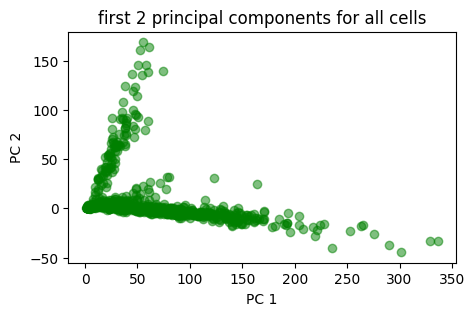

In [19]:
# Plot the cells in the 2D PCA projection
fig, ax = plt.subplots(figsize=(5, 3))

ax.scatter(X[:,0], X[:,1], alpha=0.5, c="green")

plt.title("first 2 principal components for all cells")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

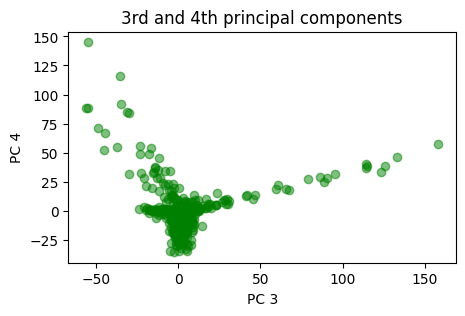

In [20]:
tsvd34 = TruncatedSVD(n_components=4)
tsvd34.fit(adata_counts.X)
X34 = tsvd34.transform(adata_counts.X)

fig, ax = plt.subplots(figsize=(5, 3))

ax.scatter(X34[:,2], X34[:,3], alpha=0.5, c="green")

plt.xlabel('PC 3')
plt.ylabel('PC 4')
plt.title("3rd and 4th principal components")
# plt.axis('off')
plt.show()

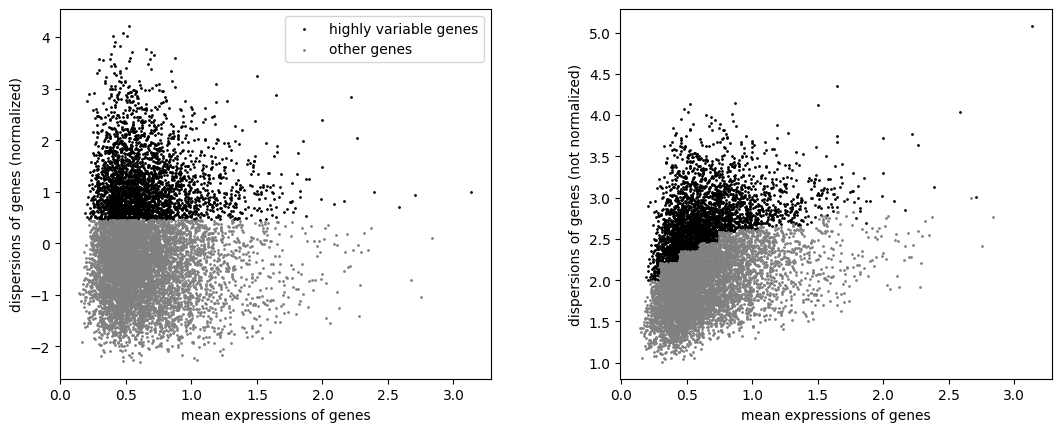

In [21]:
# normalize the data
sc.pp.normalize_per_cell(adata_counts, counts_per_cell_after=1e4)
sc.pp.log1p(adata_counts)

# flavor="cell_ranger" is consistent with Seurat and flavor="suerat" is not consistent with Seurat
sc.pp.highly_variable_genes(adata_counts, min_mean=0.01, max_mean=8, min_disp=1, n_top_genes=3000, n_bins=20, flavor="seurat")
sc.pl.highly_variable_genes(adata_counts)

In [22]:
# Cluster the cells using Louvain clustering
sc.tl.pca(adata_counts, svd_solver='arpack', use_highly_variable=True, n_comps=10)
sc.pp.neighbors(adata_counts, n_neighbors=30, n_pcs=10, knn=True)
sc.tl.louvain(adata_counts)

/Users/davidw/opt/anaconda3/envs/spatial-transcriptomics/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Users/davidw/opt/anaconda3/envs/spatial-transcriptomics/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


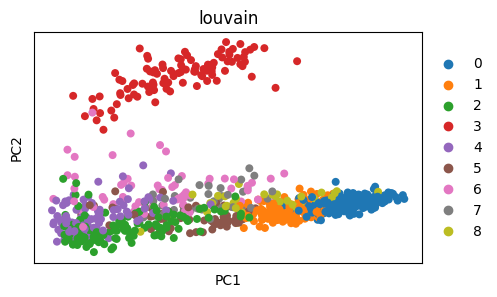

In [23]:
# Perform PCA and plot the projection to the first two dimensions, with points colored according to the Louvain clusters.
fig, ax = plt.subplots(figsize=(5, 3))
sc.pl.pca(adata_counts, color='louvain', ax=ax)

/Users/davidw/opt/anaconda3/envs/spatial-transcriptomics/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/davidw/opt/anaconda3/envs/spatial-transcriptomics/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


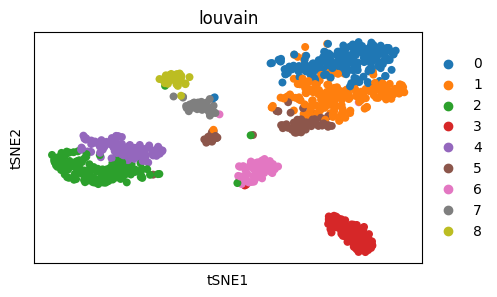

In [24]:
# Visualize cells with t-SNE. The n_pcs parameter sets the number of principal components to project to prior to 
# performing t-SNE
sc.tl.tsne(adata_counts, n_pcs=10)
fig, ax = plt.subplots(figsize=(5, 3))
sc.pl.tsne(adata_counts, color='louvain', ax=ax)


/Users/davidw/opt/anaconda3/envs/spatial-transcriptomics/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


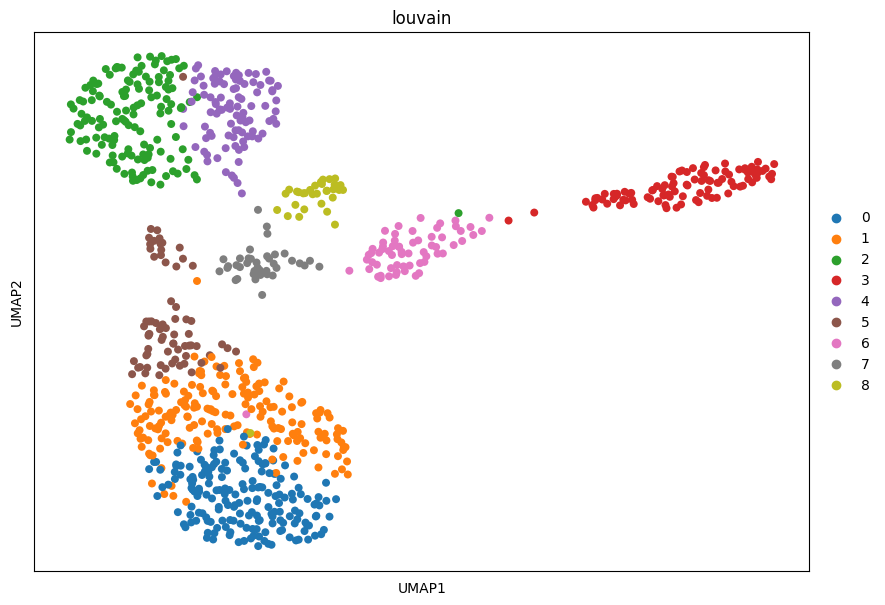

In [25]:
# Visualize cells with t-SNE. The n_pcs parameter sets the number of principal components to project to prior to 
# performing t-SNE
sc.tl.umap(adata_counts)
fig, ax = plt.subplots(figsize=(10, 7))
sc.pl.umap(adata_counts, color='louvain', ax=ax)